<a href="https://colab.research.google.com/github/Stephen-Njuguna/Moringa_school_Core_Week4_IP/blob/main/Moringa_School_Core_Week_4_Stephen_Njuguna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Autolib Electric Car-Sharing Service Company


## A) Defining Question 

### Hypothesis Research Question


1.   Autolib service board claims that all the Utilib 1.4 cars picked during the weekend are returned and this makes it easier for them to do their maintenance faster than the other two Autolib electric car models . I will do a hypothesis test to test if this claim is factual.
## Hypothesis 
1**.Null Hypothesis** - The number of Utilib 1.4 taken over the weekend is equal to the number of Utilib 1.4 electric cars returned on the weekend.
2. **Alternative hypothesis** - The number of Utilib 1.4 taken over the weekend is not equal to the number of Utilib 1.4 electric cars returned on the weekend.




## B) Defining The Matrix of Success


1.  Determining weather to reject of accept the null hypothesis in favour of the alternative hypothesis.

## C) Understanding the Concept 
Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011.It was operated by the Bolloré industry and complemented the city's bike sharing system, Velib', which was set up in 2007. The Autolib' service maintained a fleet of all-electric Bolloré Bluecars for public use on a paid subscription.

## D) Expriemental Design Taken


1.   Importing the Libraries
2.   Reading the Dataset
3.   Checking and Previewing the Dataset
4.   Data Tyding
5.   Data Cleaning
6.   Exploratory Analysis
7.   Biavariate Analysis
8.   Hypothesis Testing
9.    Summary and Conclusion 

## E) Data Relevance 

### After previewing and doing data cleaning l was left with a dataset that. I can use to solve and challenge my hypothesis statement.

## Importing Libraries

In [135]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind


## Reading Data

In [136]:
#Load the Dataset that describes the dataset
variableDataset = pd.read_excel('columns_explanation.xlsx')
variableDataset

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [137]:
#Loading the Utilib Dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')

## Checking Data

In [138]:
# Determining the no. of records in our dataset
#
df.shape

(16085, 13)

In [139]:
# Previewing the top of our dataset
#
df.head(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [140]:
# Previewing the bottom of our dataset
# 
df.tail(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [141]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [142]:
#Convert Date column from object to Datetime
df['date'] = pd.to_datetime(df['date'])

## Exploratory Data Analysis

### Tyding The Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<function matplotlib.pyplot.show>

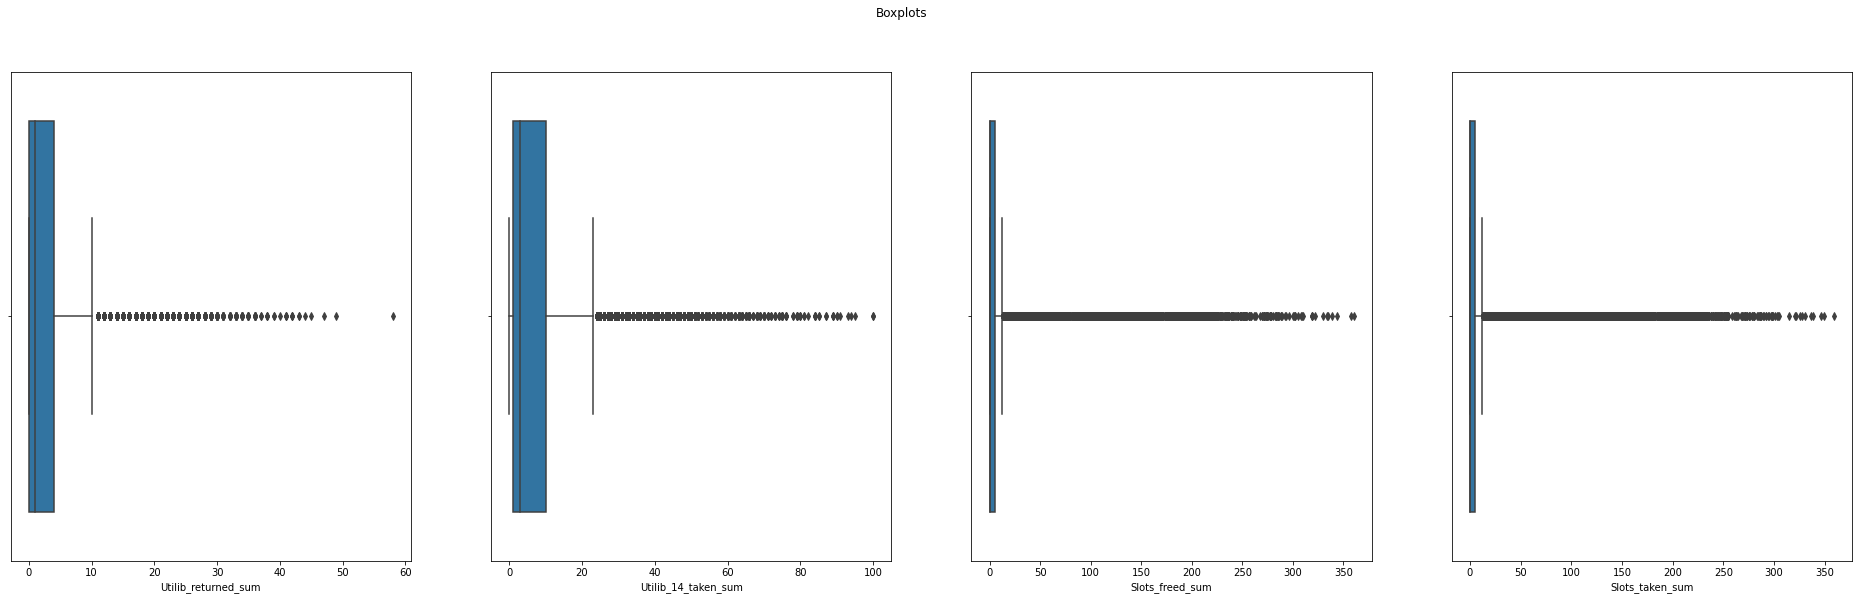

In [143]:
# Checking out for Outliers 
fig, axes = plt.subplots(1, 4, figsize= [33,9])
fig.suptitle('Boxplots')
sns.boxplot(df['Utilib_returned_sum'], ax=axes[0])
sns.boxplot(df['Utilib_14_taken_sum'], ax=axes[1])
sns.boxplot(df['Slots_freed_sum'],ax=axes[2])
sns.boxplot(df['Slots_taken_sum'],ax=axes[3])
plt.show

In [144]:
#Checking for anomalies
for value in df.columns:
 print(df[value].unique())
 print('\n')

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['2018-01-01T00:00:00.000000000' '2018-01-02T00:00:00.000000000'
 '2018-01-03T00:00:00.000000000' '2018-01-04T00:00:00.000000000'
 '2018-01-05T00:00:00.000000000' '2018-01-06T00:00:00.000000000'
 '2018-01-07T00:00:00.000000000' '2018-01-08T00:00:00.000000000'
 '2018-01-09T00:00:00.000000000' '2018-01-10T00:00:00.000000000'
 '2018-01-11T00:00:00.000000000' '2018-

In [145]:
# Identifying the Missing Data
#
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

## Univariate Analysis

### Central Measure of Tendancy 

In [146]:
#Mean
print(df.mean())

Postal code               88791.293876
n_daily_data_points        1431.330619
dayOfWeek                     2.969599
BlueCars_taken_sum          125.926951
BlueCars_returned_sum       125.912714
Utilib_taken_sum              3.698290
Utilib_returned_sum           3.699099
Utilib_14_taken_sum           8.600560
Utilib_14_returned_sum        8.599192
Slots_freed_sum              22.629033
Slots_taken_sum              22.629282
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [147]:
#Median
print(df.median())


Postal code               92340.0
n_daily_data_points        1440.0
dayOfWeek                     3.0
BlueCars_taken_sum           46.0
BlueCars_returned_sum        46.0
Utilib_taken_sum              1.0
Utilib_returned_sum           1.0
Utilib_14_taken_sum           3.0
Utilib_14_returned_sum        3.0
Slots_freed_sum               0.0
Slots_taken_sum               0.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [148]:
#Mode

### Measure of Dispersion

In [149]:
#Standard Deviation
df.std()

Postal code               7647.342000
n_daily_data_points         33.212050
dayOfWeek                    2.008378
BlueCars_taken_sum         185.426579
BlueCars_returned_sum      185.501535
Utilib_taken_sum             5.815058
Utilib_returned_sum          5.824634
Utilib_14_taken_sum         12.870098
Utilib_14_returned_sum      12.868993
Slots_freed_sum             52.120263
Slots_taken_sum             52.146030
dtype: float64

In [150]:
#Variance
df.var()

Postal code               5.848184e+07
n_daily_data_points       1.103040e+03
dayOfWeek                 4.033582e+00
BlueCars_taken_sum        3.438302e+04
BlueCars_returned_sum     3.441082e+04
Utilib_taken_sum          3.381490e+01
Utilib_returned_sum       3.392636e+01
Utilib_14_taken_sum       1.656394e+02
Utilib_14_returned_sum    1.656110e+02
Slots_freed_sum           2.716522e+03
Slots_taken_sum           2.719208e+03
dtype: float64

In [151]:
#Skewness
df.skew()

Postal code              -1.168778
n_daily_data_points      -5.742776
dayOfWeek                 0.018824
BlueCars_taken_sum        2.406355
BlueCars_returned_sum     2.412085
Utilib_taken_sum          2.556872
Utilib_returned_sum       2.578665
Utilib_14_taken_sum       2.510924
Utilib_14_returned_sum    2.511488
Slots_freed_sum           2.597406
Slots_taken_sum           2.596904
dtype: float64

In [152]:
#Kurtosis
df.kurt()

Postal code               -0.542143
n_daily_data_points       36.594846
dayOfWeek                 -1.260994
BlueCars_taken_sum         6.172692
BlueCars_returned_sum      6.186288
Utilib_taken_sum           7.702362
Utilib_returned_sum        7.936357
Utilib_14_taken_sum        7.186815
Utilib_14_returned_sum     7.185463
Slots_freed_sum            6.454514
Slots_taken_sum            6.442553
dtype: float64

In [153]:
#Frequency Table
df['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

### Plotting

<function matplotlib.pyplot.show>

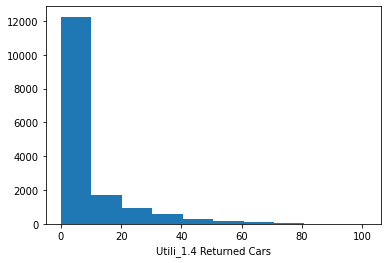

In [154]:
#ploting a histogram

plt.hist(df['Utilib_14_returned_sum'])
plt.xlabel("Utili_1.4 Returned Cars")
plt.show

<function matplotlib.pyplot.show>

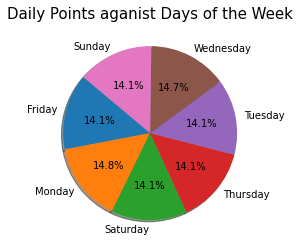

In [155]:
#Ploting a pie

df['dayOfWeek'] = df['dayOfWeek'].replace({0:'Monday',1:'Tuesday',2:'Wednesdya',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

a = df.groupby(df['dayOfWeek'])['n_daily_data_points'].count()

label = ['Friday','Monday','Saturday','Thursday','Tuesday','Wednesday','Sunday']
plt.pie(a, labels=label,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title("Daily Points aganist Days of the Week", fontsize = 15)
plt.show

## Biavariate Analysis

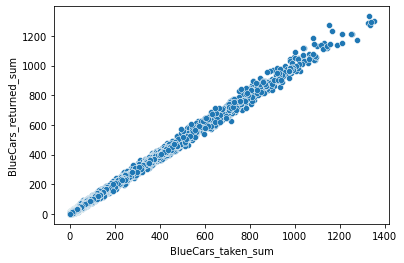

In [156]:
#Plotting a scatter plot between Blue cars Taken and Blue cars Returned

sns.scatterplot(x='BlueCars_taken_sum', y='BlueCars_returned_sum', data=df)

# The scatter plot shows that there is a strong correlation between the Bluecars taken and the blue cars returned.

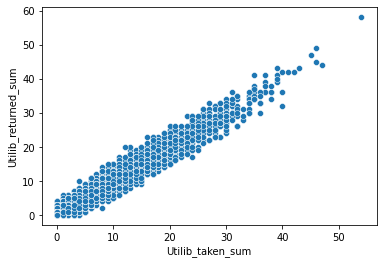

In [157]:
#Plotting a scatter plot betweeen Utulib cars Taken and Utilib cars returned
sns.scatterplot(x= 'Utilib_taken_sum',y='Utilib_returned_sum',data=df)

#There is a strong correlation between Utulib cars Taken and Utilib cars returned

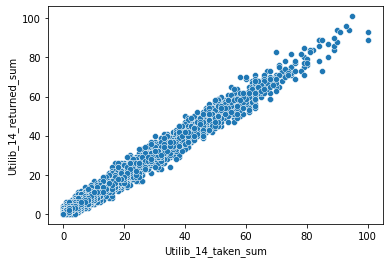

In [158]:
#PLotting a scatter plot between Utilib 1.4 cars taken and Utilib 1.4 cars returned 
sns.scatterplot(x='Utilib_14_taken_sum',y='Utilib_14_returned_sum',data=df)

#There is a strong correlation between Utilib 1.4 cars taken and Utilib 1.4 cars returned

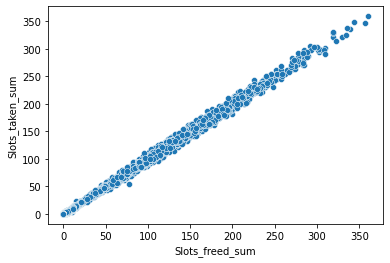

In [159]:
#Plotting scatter plot bewteen free slot and slots taken
sns.scatterplot(x='Slots_freed_sum',y='Slots_taken_sum',data=df)

#There is a strong correlaton betweeen the Free_slots and Slots_taken.

<function matplotlib.pyplot.show>

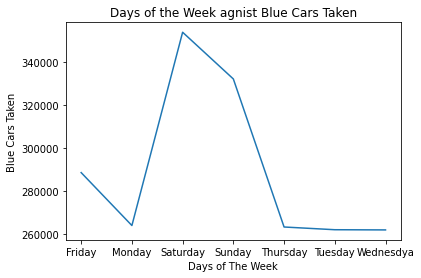

In [160]:
#plotting a line chart of Days of the week aganist Blue Cars Taken
points = df.groupby('dayOfWeek')['BlueCars_taken_sum'].sum().reset_index(name= 'BlueCars_taken_sum')
y =points['BlueCars_taken_sum']
x = points['dayOfWeek']
plt.plot(x,y)
plt.xlabel('Days of The Week')
plt.ylabel('Blue Cars Taken')
plt.title("Days of the Week agnist Blue Cars Taken")
plt.show

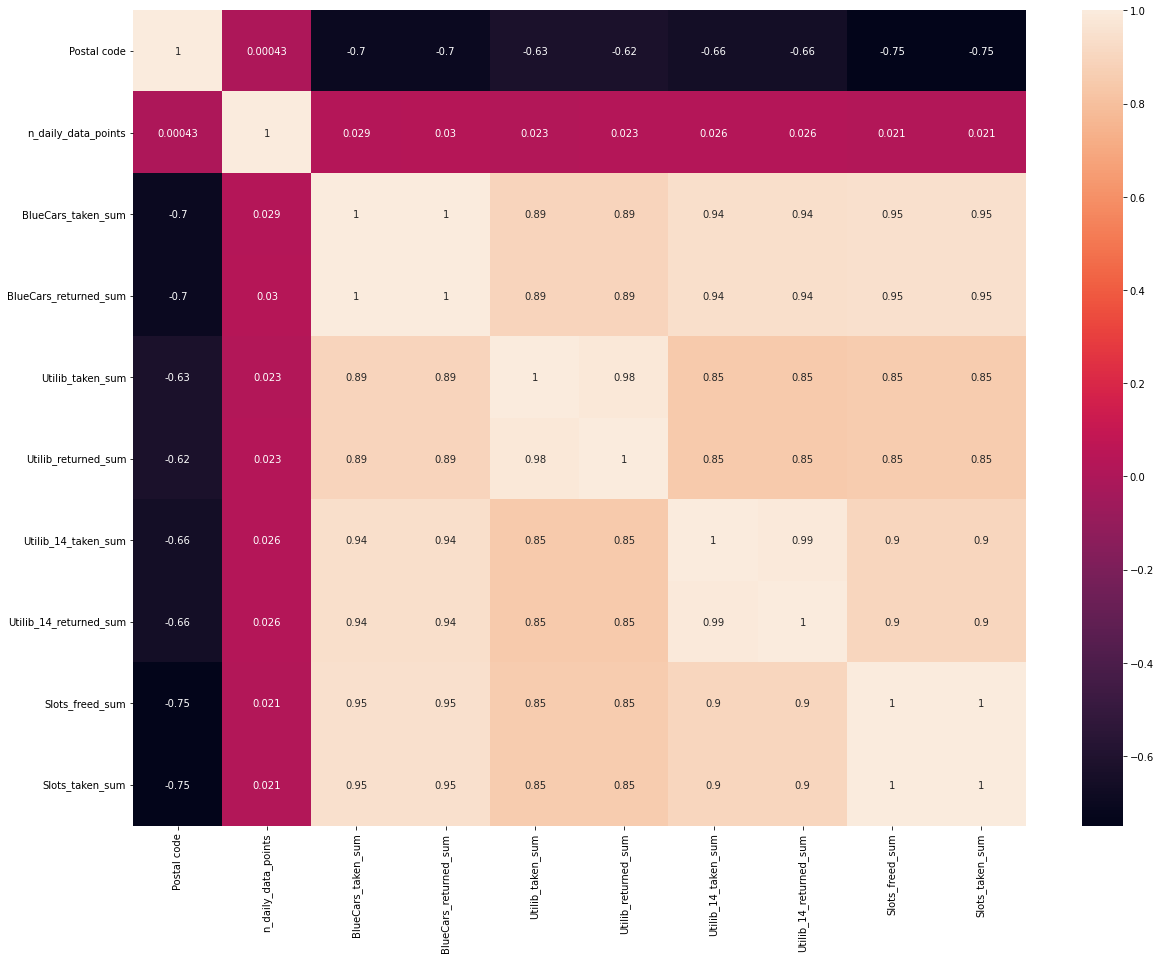

In [161]:
#Ploting a Heatmap
fig, axes = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(),annot=True)
plt.show()

### The close to 1 the correlation is the more positively correlated. 

Some observation from th heat map

1.   slots_taken is strongly positive correlated to slots free
2.   Utilib 1.4 returned is strongly postive correlated to slots freed
3. Utilib 1.4 taken is strongly positive correlated to the Utilib 1.4 returned
4. POstal code has a negative strong correlation to Utilib1.4 taken
5. daily data points has a weak positive corelation to Utilib 1.4 taken or returned

## Hypothesis Testing

### Hypothesis Statement



1. **Null Hypothesis** - The number of Utilib 1.4 taken over the weekend is equal to the number of Utilib 1.4 electric cars returned on the weekend.
2. **Alternative hypothesis** - The number of Utilib 1.4 taken over the weekend is not equal to the number of Utilib 1.4 electric cars returned on the weekend.





### Hypothesis Test Computation

In [162]:
df.head(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,Monday,weekday,110,103,3,2,10,9,22,20


In [163]:
# Defining my Population
population =df[['day_type','Utilib_14_taken_sum','Utilib_14_returned_sum']]
pop = population.loc[population['day_type']=='weekend']
pop.head(1)

,day_type,Utilib_14_taken_sum,Utilib_14_returned_sum
5,weekend,7,8


(array([3212.,  600.,  257.,  163.,  140.,   94.,   38.,   17.,   14.,
           6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

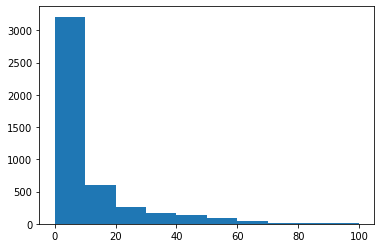

In [164]:
#check for normality 
plt.hist(pop['Utilib_14_taken_sum'])

### Rules of thumb say that the sample means are basically normally distributed as long as the sample size is at least 20 or 30. For a t-test to be valid on a sample of smaller size, the population distribution would have to be approximately normal.


In [165]:
#Choosing your sample size
import random
Sample_taken =pop['Utilib_14_taken_sum'].sample(n = 20,random_state=1)
sample_return = pop['Utilib_14_returned_sum'].sample(n = 20,random_state=1)

In [166]:
#Calculating the p-value, t-test 
statistic, pvalue = ttest_ind(Sample_taken, sample_return, equal_var=True)

# Printing out the pvalue and the statistic

print("p-value of the test = ",pvalue)
print("Statistic = ",statistic)
print("_" * 50)
if pvalue < 0.05:
  print("There is no evidence of a difference in the mean waiting time between the two branches")
  print("The p_value is too low: ",pvalue)
else:
  print("The evidence suggests a difference in mean waiting time between the two branches")
print("_" * 40)
# Means of the two samples
print(Sample_taken.mean())
print(sample_return.mean())


p-value of the test =  0.8832389582790855
Statistic =  -0.14785501676175575
__________________________________________________
The evidence suggests a difference in mean waiting time between the two branches
________________________________________
6.5
6.95


## Hypothesis Test Interpretation
### Conclusion 

(p-value)0.88 > significance level(0.05)
 
our p-value is greater than the significance level so will fail to reject the null hypothesis that, The number of Utilib 1.4 taken over the weekend is equal to the number of Utilib 1.4 electric cars returned on the weekend.

### Recommendation 
To make it easy for the service and maintenance of all the electric cars under the Autolib company, all cars taken either during the weekend or weekend should be returned to the station. Late return of the cars to the station makes it hard for the maintenance and servicing of the cars.